#**Lab 3 - Boston**

In [118]:
# Load the dataset
import numpy as np
import pandas as pd
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path = 'boston_housing.npz', test_split = 0.2, seed = 113
    )

x_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [119]:
x_train = pd.DataFrame(x_train, columns = range(x_train.shape[1]))
y_train = pd.DataFrame(y_train, columns = ['Target'])
x_test = pd.DataFrame(x_test, columns = range(x_test.shape[1]))
y_test = pd.DataFrame(y_test, columns = ['Target'])

In [120]:
print("x_train shape", x_train.shape, type(x_train))
print("y_train shape", y_train.shape, type(y_train))
print("x_test shape", x_test.shape, type(x_test))
print("y_test shape", y_test.shape, type(y_test))

x_train shape (404, 13) <class 'pandas.core.frame.DataFrame'>
y_train shape (404, 1) <class 'pandas.core.frame.DataFrame'>
x_test shape (102, 13) <class 'pandas.core.frame.DataFrame'>
y_test shape (102, 1) <class 'pandas.core.frame.DataFrame'>


In [121]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [122]:
y_train.describe()

,Target
count,404.000000
mean,22.395050
std,9.210442
min,5.000000
25%,16.675000
50%,20.750000
75%,24.800000
max,50.000000


In [123]:
# Normalization
# The reason perform normalization because all the feature variables are using different units
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train =  scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [124]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import initializers
from keras import regularizers
from keras.callbacks import EarlyStopping

In [128]:
# Building a linear stack of layers with the sequential model
L1 = 200
L2 = 100
L3 = 50

model = Sequential()
model.add(Dense(L1, input_dim = 13, activation = 'relu'))
model.add(Dense(L2, activation = 'relu'))
model.add(Dense(L3, activation = 'relu'))

# Output layer (softmax = multinominal)
model.add(Dense(1, activation = 'linear'))

In [129]:
# Compiling the sequential model (model compilation)
model.compile(loss = 'mse', metrics = ['mae'], optimizer = 'rmsprop')

In [130]:
# Training the model for 10 epochs (model history)
history = model.fit(x_train, y_train, epochs = 10, batch_size = 100, validation_data = (x_test, y_test))

Epoch 1/10
5/5 [==============================] - 1s 51ms/step - loss: 533.9155 - mae: 21.1294 - val_loss: 454.7966 - val_mae: 19.2427
Epoch 2/10
5/5 [==============================] - 0s 15ms/step - loss: 368.6466 - mae: 16.9751 - val_loss: 251.3042 - val_mae: 13.8783
Epoch 3/10
5/5 [==============================] - 0s 11ms/step - loss: 193.1850 - mae: 11.5980 - val_loss: 141.8490 - val_mae: 10.1119
Epoch 4/10
5/5 [==============================] - 0s 11ms/step - loss: 106.5224 - mae: 8.0870 - val_loss: 68.3764 - val_mae: 6.5627
Epoch 5/10
5/5 [==============================] - 0s 14ms/step - loss: 59.7456 - mae: 5.8886 - val_loss: 57.3294 - val_mae: 5.9540
Epoch 6/10
5/5 [==============================] - 0s 14ms/step - loss: 47.5301 - mae: 5.0776 - val_loss: 42.7850 - val_mae: 5.1058
Epoch 7/10
5/5 [==============================] - 0s 14ms/step - loss: 37.5707 - mae: 4.5323 - val_loss: 36.8210 - val_mae: 4.5838
Epoch 8/10
5/5 [==============================] - 0s 10ms/step - loss:

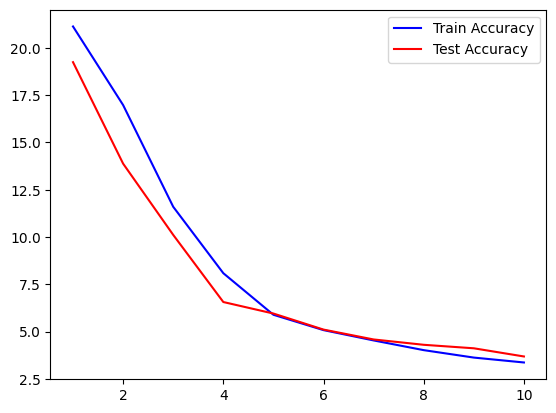

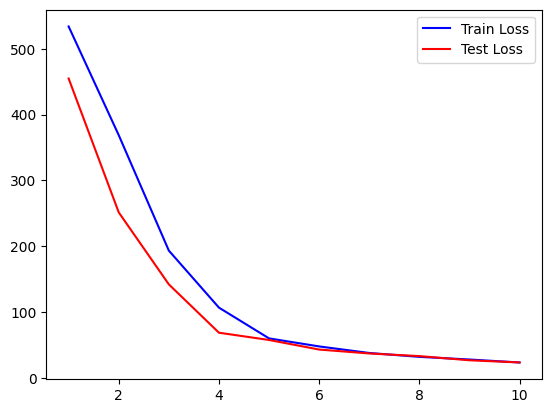

In [131]:
# History of the epochs / iterations
import matplotlib.pyplot as plt

acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, acc, 'b', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()

plt.show()

#**Model with Initializer and Regularizer**

In [132]:
from keras import initializers
from keras import regularizers

In [134]:
# Regularizer can be used for different hidden layer
L1 = 200
L2 = 100
L3 = 50

model = Sequential()
model.add(Dense(L1, input_dim = 13, activation = 'relu', 
                kernel_initializer = 'he_normal',
                kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(L2, activation = 'relu', 
                kernel_initializer = 'he_normal',
                kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(L3, activation = 'relu', 
                kernel_initializer = 'he_normal',
                kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(1, activation = 'linear'))

In [135]:
# Model compilation
model.compile(loss = 'mse', metrics = ['mae'], optimizer = 'rmsprop')

In [136]:
# Model history
history = model.fit(x_train, y_train, epochs = 10, batch_size = 100, validation_data = (x_test, y_test))

Epoch 1/10
5/5 [==============================] - 1s 79ms/step - loss: 486.1095 - mae: 19.6865 - val_loss: 262.1989 - val_mae: 13.8697
Epoch 2/10
5/5 [==============================] - 0s 15ms/step - loss: 198.0652 - mae: 11.4282 - val_loss: 100.0650 - val_mae: 8.0428
Epoch 3/10
5/5 [==============================] - 0s 15ms/step - loss: 90.4618 - mae: 7.1072 - val_loss: 73.0593 - val_mae: 6.5763
Epoch 4/10
5/5 [==============================] - 0s 19ms/step - loss: 65.0494 - mae: 5.7893 - val_loss: 56.0325 - val_mae: 5.5520
Epoch 5/10
5/5 [==============================] - 0s 15ms/step - loss: 49.2022 - mae: 4.7932 - val_loss: 49.1213 - val_mae: 5.2219
Epoch 6/10
5/5 [==============================] - 0s 21ms/step - loss: 41.9501 - mae: 4.3491 - val_loss: 42.7110 - val_mae: 4.6004
Epoch 7/10
5/5 [==============================] - 0s 20ms/step - loss: 36.3819 - mae: 3.9306 - val_loss: 38.4597 - val_mae: 4.1981
Epoch 8/10
5/5 [==============================] - 0s 15ms/step - loss: 30.31

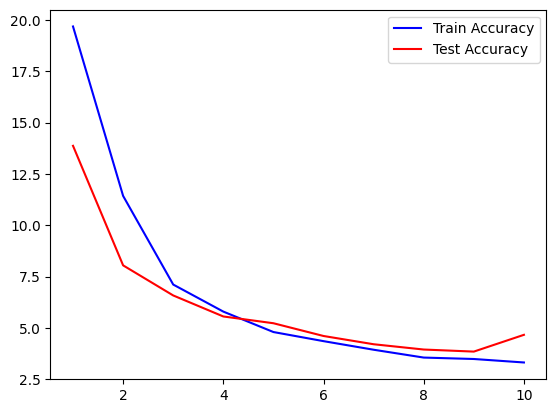

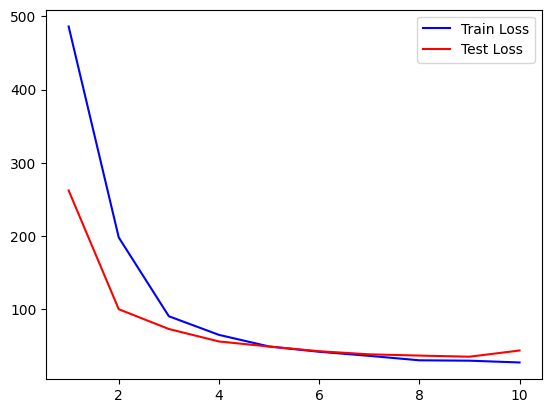

In [137]:
# History of the epochs / iterations
import matplotlib.pyplot as plt

acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, acc, 'b', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()

plt.show()

#**Dropout**

In [138]:
from keras.layers import Dropout

In [144]:
# Dropout can be used in different hidden layer
L1 = 200
L2 = 100
L3 = 50

model = Sequential()
model.add(Dense(L1, input_dim = 13, activation = 'relu', 
                kernel_initializer = 'he_normal',
                kernel_regularizer = regularizers.l2(0.01)))
model.add(Dropout(rate = 0.05))
model.add(Dense(L2, activation = 'relu'))
model.add(Dropout(rate = 0.05))
model.add(Dense(L3, activation = 'relu'))
model.add(Dropout(rate = 0.05))
model.add(Dense(1, activation = 'linear'))

In [145]:
# Model compilation
model.compile(loss = 'mse', metrics = ['mae'], optimizer = 'rmsprop')

In [146]:
# Model history
history = model.fit(x_train, y_train, epochs = 10, batch_size = 100, validation_data = (x_test, y_test))

Epoch 1/10
5/5 [==============================] - 1s 50ms/step - loss: 434.7876 - mae: 18.4187 - val_loss: 216.7993 - val_mae: 12.2226
Epoch 2/10
5/5 [==============================] - 0s 16ms/step - loss: 166.9896 - mae: 10.2385 - val_loss: 103.7109 - val_mae: 7.9024
Epoch 3/10
5/5 [==============================] - 0s 12ms/step - loss: 95.2548 - mae: 7.3618 - val_loss: 80.0976 - val_mae: 6.7762
Epoch 4/10
5/5 [==============================] - 0s 11ms/step - loss: 75.1613 - mae: 6.3466 - val_loss: 65.1421 - val_mae: 6.3883
Epoch 5/10
5/5 [==============================] - 0s 15ms/step - loss: 54.8777 - mae: 5.2275 - val_loss: 50.5741 - val_mae: 5.4208
Epoch 6/10
5/5 [==============================] - 0s 18ms/step - loss: 44.3490 - mae: 4.6705 - val_loss: 43.7854 - val_mae: 4.8715
Epoch 7/10
5/5 [==============================] - 0s 11ms/step - loss: 39.2580 - mae: 4.2349 - val_loss: 33.9761 - val_mae: 4.0800
Epoch 8/10
5/5 [==============================] - 0s 11ms/step - loss: 30.83

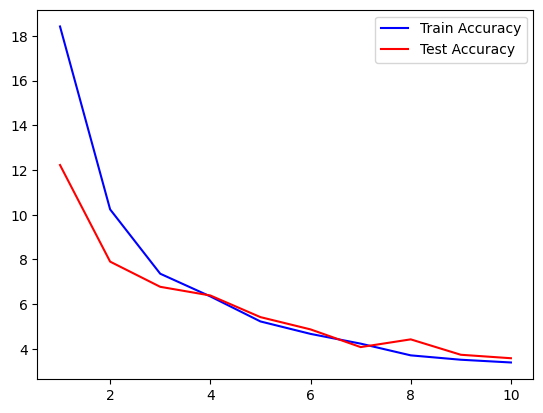

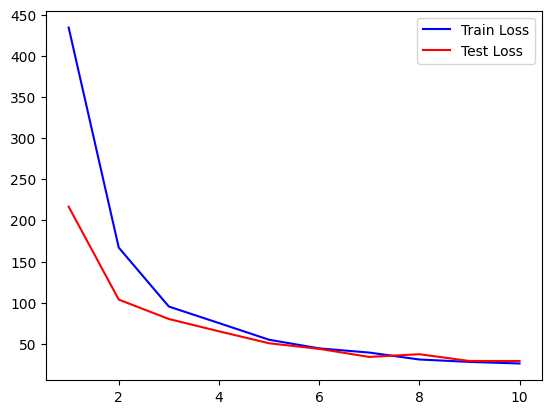

In [147]:
# History of the epochs / iterations
import matplotlib.pyplot as plt

acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, acc, 'b', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()

plt.show()

#**Early Stopping**

In [148]:
# When the training and testing set start to diverge, then can use early stopping, it is based on validation loss
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience = 3)

In [151]:
# Dropout can be used for different hidden layer
L1 = 200
L2 = 100
L3 = 50

model = Sequential()
model.add(Dense(L1, input_dim = 13, activation = 'relu', 
                kernel_initializer = 'he_normal',
                kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(L2, activation = 'relu'))
model.add(Dense(L3, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [153]:
# Model compilation
model.compile(loss = 'mse', metrics = ['mae'], optimizer = 'rmsprop')

In [154]:
# Model history
history = model.fit(x_train, y_train, epochs = 30, batch_size = 100, validation_data = (x_test, y_test), callbacks = [early_stopping_monitor])

Epoch 1/30
5/5 [==============================] - 1s 71ms/step - loss: 416.0717 - mae: 18.1570 - val_loss: 237.0506 - val_mae: 13.0799
Epoch 2/30
5/5 [==============================] - 0s 15ms/step - loss: 177.4499 - mae: 10.9675 - val_loss: 100.9816 - val_mae: 8.2842
Epoch 3/30
5/5 [==============================] - 0s 16ms/step - loss: 86.6476 - mae: 7.3369 - val_loss: 70.6125 - val_mae: 6.5922
Epoch 4/30
5/5 [==============================] - 0s 22ms/step - loss: 59.3347 - mae: 5.7688 - val_loss: 52.8998 - val_mae: 5.5561
Epoch 5/30
5/5 [==============================] - 0s 16ms/step - loss: 43.5489 - mae: 4.7282 - val_loss: 43.3764 - val_mae: 4.7814
Epoch 6/30
5/5 [==============================] - 0s 22ms/step - loss: 32.8009 - mae: 3.9270 - val_loss: 33.9105 - val_mae: 4.1109
Epoch 7/30
5/5 [==============================] - 0s 20ms/step - loss: 27.3118 - mae: 3.4246 - val_loss: 41.2499 - val_mae: 4.6134
Epoch 8/30
5/5 [==============================] - 0s 22ms/step - loss: 25.77

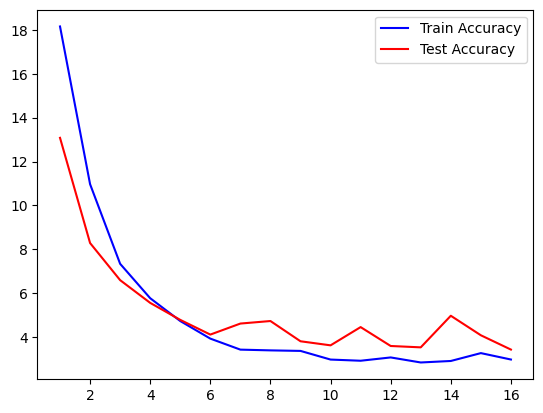

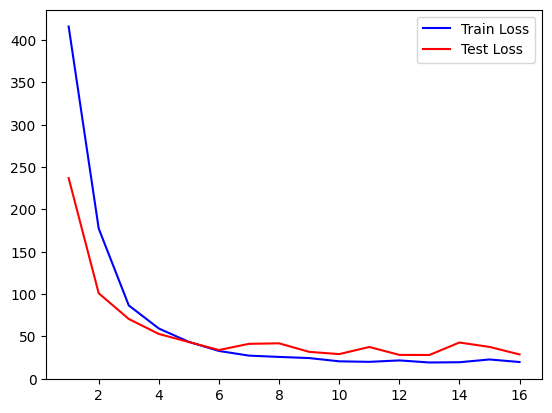

In [155]:
# History of the epochs / iterations
import matplotlib.pyplot as plt

acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, acc, 'b', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()

plt.show()

#**Grid Search Hypermarketers**

In [160]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [167]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

In [168]:
# Function to create model, required for KerasClassifier
def create_model():
  # Create model
  model = Sequential()

  model.add(Dense(200, input_dim = 13, activation = 'relu'))
  model.add(Dense(100, activation = 'relu'))
  model.add(Dense(50, activation = 'relu'))
  model.add(Dense(1, activation = 'linear'))

  # Compile model
  model.compile(loss = 'mse', metrics = ['mae'], optimizer = 'rmsprop')

  return model

#**Tune the Batch Size and Epochs**


By setting verbose 0, 1, or 2 you just say how do you want to 'see' the training progress for each epoch. verbose = 0 will show you nothing (silent).

n-jobs = -1 means using all processors. This means that the n_jobs parameter can be used to distribute and exploit all the CPUs available in the local computer.

In [170]:
# Create model
# verbose 0 means we wouldn't have a detailed process of each iteration
model = KerasRegressor(model = create_model, verbose = 0)

# Define the grid search parameters
# n_jobs = -1 means using all processors to run the jobs in parallel
# cv means the number of cross-validation
batch_size = [100, 128]
epochs = [10, 15, 20]

param_grid = dict(batch_size = batch_size, epochs = epochs)

grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, cv = 3)
grid_result = grid.fit(x_train, y_train)

In [171]:
# Summarize results
# grid_result.best_score_, grid_result.best_params_ are all come from grid_result
# The first code will print the best score and best parameters
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('%f (%f) with: %r' % (mean, stdev, param))

# The 1st column is referred to the accuracy / mean value
# The 2nd column is referred to the standard deviation
# The 3rd column is referred to the parameters

Best: 0.781637 using {'batch_size': 100, 'epochs': 20}
0.437642 (0.080311) with: {'batch_size': 100, 'epochs': 10}
0.725420 (0.055032) with: {'batch_size': 100, 'epochs': 15}
0.781637 (0.035356) with: {'batch_size': 100, 'epochs': 20}
0.488974 (0.072720) with: {'batch_size': 128, 'epochs': 10}
0.630786 (0.068812) with: {'batch_size': 128, 'epochs': 15}
0.730133 (0.057179) with: {'batch_size': 128, 'epochs': 20}


#**Tune the Training Optimization Algorithm (Only)**

In [172]:
# Create model
model = KerasRegressor(model = create_model, loss = 'mse', epochs = 20, batch_size = 128, verbose = 0)

# Define the grid search parameters
# n_jobs = -1 means using all processors
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

param_grid = dict(optimizer = optimizer)

grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, cv = 3)
grid_result = grid.fit(x_train, y_train)

In [173]:
# Summarize results
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.750789 using {'optimizer': 'Adagrad'}
0.723023 (0.031635) with: {'optimizer': 'SGD'}
0.701675 (0.048724) with: {'optimizer': 'RMSprop'}
0.750789 (0.037803) with: {'optimizer': 'Adagrad'}
0.698395 (0.084090) with: {'optimizer': 'Adadelta'}
0.726807 (0.017327) with: {'optimizer': 'Adam'}
0.742474 (0.011279) with: {'optimizer': 'Adamax'}
0.689435 (0.026680) with: {'optimizer': 'Nadam'}


#**Tune the Neuron Activation Function**

In [177]:
# Function to create model, required for KerasClassifier
def create_model(activation = 'relu'):
  # Create model
  model = Sequential()

  model.add(Dense(200, input_dim = 13, activation = activation))
  model.add(Dense(100, activation = activation))
  model.add(Dense(50, activation = activation))
  model.add(Dense(1, activation = 'linear'))

  # Compile model
  model.compile(loss = 'mse', metrics = ['mae'], optimizer = 'rmsprop')

  return model

In [178]:
# Create model
model = KerasRegressor(model = create_model, epochs = 10, batch_size = 10, verbose = 0)

# Define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

param_grid = dict(model__activation = activation)

grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, cv = 3)
grid_result = grid.fit(x_train, y_train)

In [179]:
# Summarize results
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.813726 using {'model__activation': 'relu'}
-5.855190 (1.080360) with: {'model__activation': 'softmax'}
0.647172 (0.176195) with: {'model__activation': 'softplus'}
-0.068989 (0.141071) with: {'model__activation': 'softsign'}
0.813726 (0.048447) with: {'model__activation': 'relu'}
0.125902 (0.073206) with: {'model__activation': 'tanh'}
-1.117335 (0.125466) with: {'model__activation': 'sigmoid'}
-1.405698 (0.404388) with: {'model__activation': 'hard_sigmoid'}
0.626031 (0.060546) with: {'model__activation': 'linear'}


#**Tune the Number of Neurons**

In [188]:
# Function to create model, required for KerasClassifier
def create_model(n1 = 200, n2 = 100, n3 = 50):
  # Create model
  model = Sequential()

  model.add(Dense(n1, input_dim = 13, activation = 'relu'))
  model.add(Dense(n2, activation = 'relu'))
  model.add(Dense(n3, activation = 'relu'))
  model.add(Dense(1, activation = 'linear'))

  # Compile model
  model.compile(loss = 'mse', metrics = ['mae'], optimizer = 'rmsprop')

  return model

In [187]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor()
print(regressor.get_params().keys())

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])


In [190]:
# Create model
model = KerasRegressor(build_fn=create_model, n1 = 200, n2 = 100, n3 = 50, verbose=0)

# Define the grid search parameters
batch_size = [100, 128]
epochs = [10, 15, 20]
n1 = [100, 200, 300]
n2 = [50, 100, 150]
n3 = [25, 50, 75]

param_grid = dict(batch_size=batch_size, epochs=epochs, n1 = n1, n2 = n2, n3 = n3)

grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, cv = 3)
grid_result = grid.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


In [191]:
# Summarize results
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.822614 using {'batch_size': 100, 'epochs': 20, 'n1': 300, 'n2': 150, 'n3': 75}
-1.503965 (1.024447) with: {'batch_size': 100, 'epochs': 10, 'n1': 100, 'n2': 50, 'n3': 25}
-0.395768 (0.446989) with: {'batch_size': 100, 'epochs': 10, 'n1': 100, 'n2': 50, 'n3': 50}
-0.229286 (0.451033) with: {'batch_size': 100, 'epochs': 10, 'n1': 100, 'n2': 50, 'n3': 75}
-0.096015 (0.143672) with: {'batch_size': 100, 'epochs': 10, 'n1': 100, 'n2': 100, 'n3': 25}
0.124543 (0.446823) with: {'batch_size': 100, 'epochs': 10, 'n1': 100, 'n2': 100, 'n3': 50}
0.330313 (0.187478) with: {'batch_size': 100, 'epochs': 10, 'n1': 100, 'n2': 100, 'n3': 75}
0.130555 (0.170176) with: {'batch_size': 100, 'epochs': 10, 'n1': 100, 'n2': 150, 'n3': 25}
0.425915 (0.179245) with: {'batch_size': 100, 'epochs': 10, 'n1': 100, 'n2': 150, 'n3': 50}
0.506891 (0.099379) with: {'batch_size': 100, 'epochs': 10, 'n1': 100, 'n2': 150, 'n3': 75}
-1.081721 (0.935200) with: {'batch_size': 100, 'epochs': 10, 'n1': 200, 'n2': 50, 'n

#**Outcomes:**

1. Original model gives "loss: 23.1282" and "mae: 3.3671".
2. Model with initializer (he_normal) and regularizer (learning rate 0.01) gives "loss: 27.3352" and "mae: 3.3094".
3. Model with dropout (dropout rate 5% in all hidden layers) gives "loss: 25.9839" and "mae: 3.3920".
4. Model with early stopping after 3 patience gives "loss: 19.7547" and "mae: 2.9738".
5. Model using gridsearch with batch size and epochs tuning gives Best: 0.781637 using {'batch_size': 100, 'epochs': 20}.
6. Model using gridsearch with training optimization algorithm tuning gives Best: 0.750789 using {'optimizer': 'Adagrad'}.
7. Model using gridsearch with neuron activation function tuning gives Best: 0.813726 using {'model__activation': 'relu'}.
8. Model using gridsearch with number of neurons tuning gives Best: 0.822614 using {'batch_size': 100, 'epochs': 20, 'n1': 300, 'n2': 150, 'n3': 75}

#**Conclusion:**

Original model does not has significant improve after applying initializer, regularizer, and dropout. However, Early stopping does improve the model performance.

On the other hand, the gridsearch gives the best performance when batch size = 100, epochs = 20, optimizer = Adagrad, neuron activation function = relu, and neurons for hidden layers = 300, 150, and 75.